In [47]:
import tensorflow as tf
import keras
from tensorflow.keras.datasets import cifar10
from keras.datasets import mnist
from matplotlib import pyplot


In [48]:
# 1. 데이터 로드  
(train_images, train_labels) ,( test_images, test_labels) = cifar10.load_data()

def augment(image,label):
    #무작위로 이미지 좌우로 뒤집기
    image = tf.image.random_flip_left_right(image)
    # 상하 뒤집기
    image = tf.image.random_flip_up_down(image)
    #이미지 밝기 조절
    image = tf.image.random_brightness(image,0.2)
    #이미지 대비 조절
    image = tf.image.random_contrast(image , lower = 0.9 , upper=1.1)
    
    return image,label
 

#3. 정수형 이미지 데이터 변환를 float 형변환 , > 0 ~1.0 범위로 지정 255로 나눈다
train_images= train_images.astype('float32')
test_images= test_images.astype('float32')

#4 데이터 객체 생성
train_dataset = tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images,test_labels))

#5 데이터 증강 적용
train_dataset = train_dataset.map(augment,num_parallel_calls = tf.data.AUTOTUNE)

#6 배치 처리 및 셔플 반복처리
train_dataset = train_dataset.shuffle(10000).batch(32).repeat()
test_dataset = test_dataset.batch(32)

In [49]:
import numpy as np
#11. 이미지 데이터 차원을 바꾸기    channels_first로 사용 
#train_images = np.transpose(train_images, [0, 3, 1, 2])
#test_images = np.transpose(test_images, [0, 3, 1, 2])
#test_images.shape

In [50]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Activation ,Rescaling , Dropout ,BatchNormalization ,RandomFlip , RandomRotation

#12. CNN모형 만들기   
model_cnn = Sequential([    
    Rescaling(1./255, input_shape=(32, 32, 3)),
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    
    Conv2D(32, 3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.2),
    
    Conv2D(64, 3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.2),
    
    Conv2D(128, 3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.2),
    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [51]:
#13 모형 속성 지정  
model_cnn.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(),  metrics=['accuracy'])


In [52]:
#14.모형 실행 

## 전체 데이터셋을 배치 크기로 나누면 에폭 당 스텝 수를 계산할 수 있다.
## steps_per_epoch = total_samples / batch_size
## steps_per_epoch = 50000 / 32 = 1562.5
# 훈련데이터셋 1000개의 샘플, 배치 크기 100 = steps_per_epoch(10)

#batch_size = 데이터 분할 단위 = 32라면 

hist = model_cnn.fit(train_images, train_labels,
                     steps_per_epoch = len(train_images) // 32,
                     validation_steps = len(test_images) // 32,
                     epochs=10, validation_data = test_dataset,verbose=1 ) 
           

Epoch 1/10


ValueError: in user code:

    File "C:\Users\taeeon.kim\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\taeeon.kim\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\taeeon.kim\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\taeeon.kim\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\taeeon.kim\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "C:\Users\taeeon.kim\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\taeeon.kim\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\taeeon.kim\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\taeeon.kim\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\taeeon.kim\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [34]:
#15.결과 확인
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 32, 32, 3)         0         
                                                                 
 random_rotation (RandomRot  (None, 32, 32, 3)         0         
 ation)                                                          
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_4 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)       

313/313 [==============================] - 2s 7ms/step - loss: 1.3802 - accuracy: 0.5170
정답률 = 0.5170000195503235 loss = 1.3802393674850464


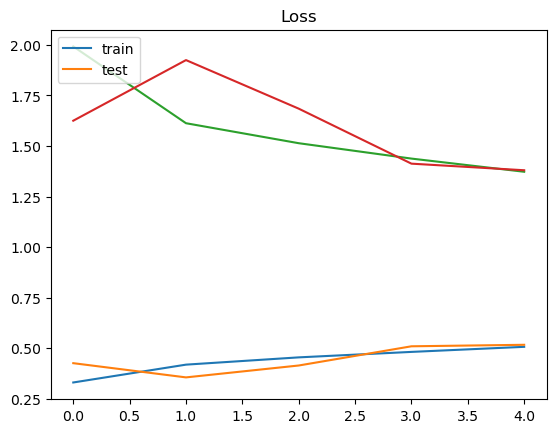

In [35]:
import matplotlib.pyplot as plt
#16.모델 평가  
score   = model_cnn.evaluate(test_images , test_labels, verbose = 1 )
print ('정답률 =', score[1] ,  'loss =' , score[0]) 

#학습모형 , 정답률
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc ='upper left')

# 손실 값 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc ='upper left')


In [36]:
#17. 모델 저장 
model_cnn.save('my_model.h5')